# KMP 的使用场景

当出现字符串不匹配时，可以记录一部分之前已经匹配的文本内容，利用这些信息避免从头再去匹配。

所以重点是：如何记录已经匹配的文本内容，也是next数组肩负的重任。



## 什么是前缀表

- 前缀：指不包含最后一个字符的所有以第一个字符开头的连续子串。
- 后缀：指不包含第一个字符的所有以最后一个字符结尾的连续子串。

前缀表：起始位置到下标`i`之前（包括`i`）的子串中，有多大长度的相同前缀后缀。

### 前缀表的形式

next数组

### 前缀表的作用？

前缀表是用来回退的，它记录了模式串与主串（文本串）不匹配的时候，模式串应该从哪里开始重新匹配。

要在 文本串 aabaabaafa，中查找是否出现过一个模式串 aabaaf

要在 文本串 aabaabaafa，中查找是否出现过一个模式串 aabaaf

要在 文本串 aabaabaafa，中查找是否出现过一个模式串 aabaaf

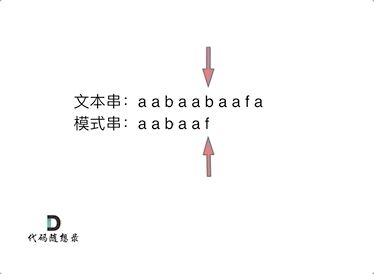


图中，文本串中第六个字符`b`和模式串种的第六个字符`f`,不匹配了，

如果使用前缀表，就不会从头匹配，而是从上次已经匹配的内容开始匹配，找到了模式串中第三个字符b继续开始匹配。


**前缀表是如何记录？**

前缀表的任务是当前位置匹配失败，找到之前已经匹配上的位置，再重新匹配，意味着在某个字符失配时，前缀表会告诉你下一步匹配中，模式串应该跳到哪个位置。



### 什么是前缀表？

记录下标 i 之前（包括i）的字符串中，有多大长度的相同前缀后缀。

## 最长公共前后缀

字符串的

前缀是指 不包含最后一个字符的所有以第一个字符开头的连续子串。

后缀： 不包含第一个字符的所有以最后一个字符结尾的连续子串。

因此尽量说 最长相等前后缀。

前缀表要求的就是相同前后缀的长度。


下标5之前这部分的字符串的最长相等的前缀 和后缀字符串是 子字符串aa，因为找到了最长相等的前缀和后缀，匹配失败的位置是后缀子串的后面，那么我们找到与其相同的前缀的后面重新匹配就可以了、


前缀表具有告诉我们当前位置匹配失败，跳到之前已经匹配过的地方的能力。

把求得的最长相同前后缀的长度就是对应前缀表的元素。


模式串与前缀表对应位置的数字表示的就是：下标i之前（包含i）的字符串中，有多大长度的相同前后缀。


那么如何利用前缀表找到 当字符不匹配的时候指针应该移动的位置。

找到的不匹配的位置，此时我们要看它的前一个字符的前缀表的数值是多少。

为什么要前一个字符的前缀表的数值呢？因为要找前面字符串的最长相同的前缀和后缀。

所以 要看前一位的前缀表的数值。

前一个字符的前缀表的数值是2，所以要把下标移动到下标2的位置继续匹配，


最后就在文本串中找到了和模式串匹配的子串了。

## next数组

很多KMP算法的实现都是使用next数组来做回退操作，那么next数组与前缀表有什么关系呢？

next数组就可以是前缀表，但是很多实现都是把前缀表统一减一（右移一位，初始位置为-1）之后作为next数组。

next数组既可以就是前缀表，也可以是前缀表统一减一（右移一位，初始位置为-1）

### 如何使用next数组来匹配

以前缀表统一减一之后的next数组来做演示。


有了next数组，就可以根据next数组来匹配文本串s,和模式串t

注意next数组是新前缀表（旧前缀表统一减一）

### 构造next数组

定义一个函数getNext来构建next数组，函数参数为指向next数组的指针，和一个字符串，


构造next数组其实就是计算模式串s,前缀表的过程，主要有如下三步：

1. 初始化
2. 处理前后缀不相同的情况
3. 处理前后缀相同的情况



#### 初始化

定义两个指针i和j，j指向前缀末尾位置，i指向后缀末尾位置。

对next数组进行初始化赋值。

```c++
int j = -1;
next[0] = j;
```


j为什么要初始化为-1呢，因为之前说过，前缀表要统一减一的操作仅仅是其中的一种实现，我们选择j初始化为-1，（当然也可以j不初始化为-1的实现代码）


next[i]表示i(包括i)之前最长相等的前后缀长度（其实就是j）

所以初始化 next[0] = j


#### 处理前后缀不相同的情况

